In [0]:
# Keras, dataset, and VGG19 imports
import keras
from keras.datasets import cifar10
from keras.applications import VGG19

Using TensorFlow backend.


In [0]:
# Loading VGG19 with imagenet weights
from keras.layers import Input

vgg19_model = VGG19(include_top = True, weights='imagenet')
vgg19_model.summary()





574717952/574710816 [==============================] - 17s 0us/step


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________________

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# define new empty model
model = Sequential()

# add all layers except output from VGG19 to new model
for layer in vgg19_model.layers[:-1]:
  model.add(layer)
  
# freeze all weights
for layer in model.layers:
  layer.trainable = False
  
# add dropout layer and new output layer
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
# load dataset
(x_train, y_train) , (x_val, y_val) = cifar10.load_data()

In [0]:
import numpy as np
import cv2

In [0]:
import matplotlib.pyplot as plt

NUM_CLASSES = 10

# Onehot encode labels

y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [0]:
# returns batch_size random samples from either training set or validation set
# resizes each image to (224, 244, 3), the native input size for VGG19
def getBatch(batch_size, train_or_val='train'):
  x_batch = []
  y_batch = []
  if train_or_val == 'train':
    idx = np.random.randint(0, len(x_train), (batch_size))

    for i in idx:
      img = cv2.resize(x_train[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_train[i])
  elif train_or_val == 'val':
    idx = np.random.randint(0, len(x_val), (batch_size))

    for i in idx:
      img = cv2.resize(x_val[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_val[i]) 
  else:
    print("error, please specify train or val")
   
  x_batch = np.array(x_batch)
  y_batch = np.array(y_batch)
  return x_batch, y_batch
    

In [77]:
EPOCHS = 20
BATCH_SIZE = 250
VAL_SIZE = 500
STEPS = 50


for e in range(EPOCHS):
  train_loss = 0
  train_acc = 0
  
  for s in range(STEPS):
    x_batch, y_batch = getBatch(BATCH_SIZE, "train")
    out = model.train_on_batch(x_batch, y_batch)
    train_loss += out[0]
    train_acc += out[1]
  
  print(f"Epoch: {e}\nTraining Loss = {train_loss / STEPS}\tTraining Acc = {train_acc / STEPS}")
  
  x_v, y_v = getBatch(VAL_SIZE, "val")
  eval = model.evaluate(x_v, y_v)
  print(f"Validation loss: {eval[0]}\tValidation Acc: {eval[1]}\n")
  
  


Epoch: 0
Training Loss = 0.666223075389862	Training Acc = 0.7761600005626679
500/500 [==============================] - 3s 6ms/step
Validation loss: 0.467492107629776	Validation Acc: 0.8380000004768372

Epoch: 1
Training Loss = 0.6494839888811111	Training Acc = 0.7810399985313415
500/500 [==============================] - 3s 6ms/step
Validation loss: 0.6111759157180786	Validation Acc: 0.802

Epoch: 2
Training Loss = 0.6427463239431381	Training Acc = 0.786159998178482
500/500 [==============================] - 3s 6ms/step
Validation loss: 0.6420768899917603	Validation Acc: 0.7739999990463257

Epoch: 3
Training Loss = 0.6296967583894729	Training Acc = 0.7855200040340423
500/500 [==============================] - 3s 6ms/step
Validation loss: 0.5033636875152588	Validation Acc: 0.8520000009536743

Epoch: 4
Training Loss = 0.631066483259201	Training Acc = 0.7894399964809418
500/500 [==============================] - 3s 6ms/step
Validation loss: 0.5759579863548279	Validation Acc: 0.7979999990

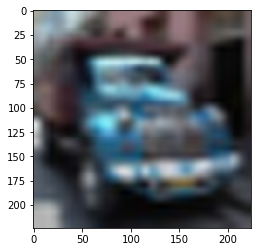

pred: truck
acct: truck


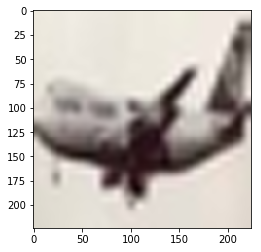

pred: airplane
acct: airplane


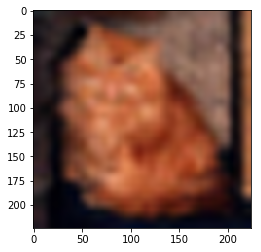

pred: cat
acct: cat


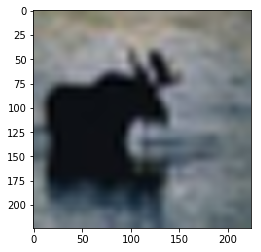

pred: deer
acct: deer


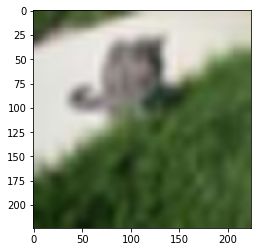

pred: deer
acct: cat


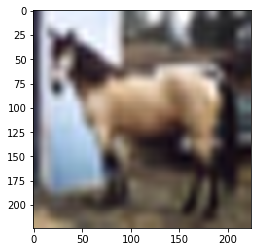

pred: horse
acct: horse


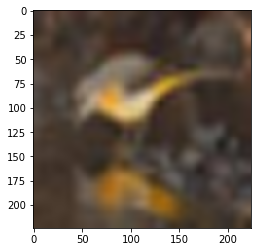

pred: bird
acct: bird


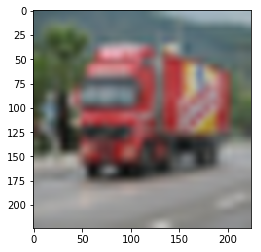

pred: truck
acct: truck


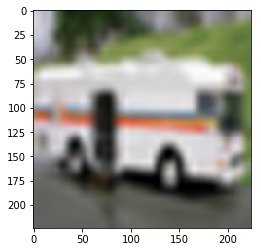

pred: automobile
acct: truck


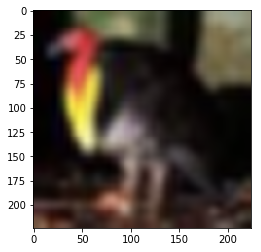

pred: bird
acct: bird


In [81]:
# Sample outputs from validation set
CATEGORIES = "airplane automobile bird cat deer dog frog horse ship truck".split(" ")

import matplotlib.pyplot as plt

x_v, y_v = getBatch(10, "val")

for i in range(10):

  import numpy as np
  plt.imshow(x_v[i])
  plt.show()
  print("pred: " +  CATEGORIES[np.argmax(model.predict(x_v[i:i+1]))])
  print("acct: " + CATEGORIES[np.argmax(y_v[i])])


 
